# How does MoMA Remain 'Modern' and 'Contemporary'?
> The Museum of Modern Art or 'MoMA' is a world renown art museum in New York City. Established in 1929, the museum specializes in modern and contemporary art.

- toc:true
- branch: master
- badges: true
- comments: true
- author: Hamel Husain & Jeremy Howard
- categories: [fastpages, jupyter]

In [7]:
# hide
# Please run this cell and then restart the kernel
!pip install -U ipywidgets

# How does MoMA Remain 'Modern' and 'Contemporary'?

Name: Alana Malika R.


Date: March 14, 2022

## Introduction

The Museum of Modern Art or 'MoMA' is a world renown art museum in New York City. Established in 1929, the museum specializes in modern and contemporary art.

Modern art is defined as works produced approximately from the 1860s to the 1970s. During this period, art styles that rejects traditional aesthetics fluorished such as Impressionism by Claude Monet and Abstract Expressionism by Rothko. Meanwhile, contemporary art refers to pieces that are produced by living artists today or during the second half of the 20th century onwards. This includes works by Yayoi Kusuma and Jean-Michel Basquiat.

> <em>"At The Museum of Modern Art and MoMA PS1, we celebrate creativity, openness, tolerance, and generosity. We aim to be inclusive places— both onsite and online—where diverse cultural, artistic, social, and political positions are welcome. We’re committed to sharing the most thought-provoking modern and contemporary art, and hope you will join us in exploring the art, ideas, and issues of our time."</em>

Based on these definitions and MoMA's mission statement above, one may assume that MoMA's acquisition team is committed to keeping up with the times. Therefore a question arises: does MoMA's acquisition collection reflect the external trends of today?

### Research Question

How has MoMA’s acquisition reflect external trends in technology development and social representation? How does MoMa keep it's collection 'modern' and 'contemporary'?

### Data Source

MoMA's acquisition data from 1929 to 2019 is available to the public through [Github](https://github.com/MuseumofModernArt/collection). This research data source contains two data sets:

- Artwork catalog: Spanning 138,151 records, this data includes every work that have been accessioned into MoMA’s collection and cataloged to the museum’s database. It catalogs basic metadata for each work including title, artist, date made, medium, dimensions, and date acquired by the Museum.
- Artist catalog: Spanning 15,222 records, this data includes every artist whose work has been acquired in MoMA's collection and has been cataloged to the museum’s database. It catalogs basic metadata for each artist, including name, nationality, gender, birth year, death year, Wiki QID, and Getty ULAN ID.

## Methods

To answer my research questions, I will conduct a data analysis using Python and sevaral data libraries:
- Pandas
- Seaborn
- Folium
- Matplotlib
- Ipywidgets

In [1]:
#collapse-show
import pandas as pd
import seaborn as sns
import folium
from folium import plugins
import matplotlib.pyplot as plt
import ipywidgets
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap


### Data Cleaning

Using a Pandas dataframe, I was able to see how the acquisition metadata is formatted and decided to do some data cleaning

In [2]:
momaartist_df = pd.read_csv('Artists.csv')
momaartwork_df = pd.read_csv('Artworks.csv')

In [3]:
momaartist_df.head()


,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN
0,1,Robert Arneson,"American, 1930–1992",American,Male,1930,1992,NaN,NaN
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,Male,1936,0,NaN,NaN
2,3,Bill Arnold,"American, born 1941",American,Male,1941,0,NaN,NaN
3,4,Charles Arnoldi,"American, born 1946",American,Male,1946,0,Q1063584,500027998.0
4,5,Per Arnoldi,"Danish, born 1941",Danish,Male,1941,0,NaN,NaN


In [4]:
#collapse-hide
momaartwork_df.head()


,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1896,Ink and cut-and-pasted painted pages on paper,...,http://www.moma.org/media/W1siZiIsIjU5NDA1Il0s...,NaN,NaN,NaN,48.6000,NaN,NaN,168.9000,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(Male),1987,Paint and colored pencil on print,...,http://www.moma.org/media/W1siZiIsIjk3Il0sWyJw...,NaN,NaN,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...",...,http://www.moma.org/media/W1siZiIsIjk4Il0sWyJw...,NaN,NaN,NaN,34.3000,NaN,NaN,31.8000,NaN,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1980,Photographic reproduction with colored synthet...,...,http://www.moma.org/media/W1siZiIsIjEyNCJdLFsi...,NaN,NaN,NaN,50.8000,NaN,NaN,50.8000,NaN,NaN
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, color pencil, ink, and gouache on tr...",...,http://www.moma.org/media/W1siZiIsIjEyNiJdLFsi...,NaN,NaN,NaN,38.4000,NaN,NaN,19.1000,NaN,NaN


I discarded irrelevant columns such as 'ConstituentID' in both dataframes, and added columns that will be useful to my analysis such as 'Decades'. To see how I did this, peruse the files in the 'Dataset Notebooks' folder.

In [3]:
#collapse-show
stacks = pd.read_csv('stacks.csv')
createacq = pd.read_csv('createacq.csv')
createacq2 = pd.read_csv('createacq2.csv')
momamedia = pd.read_csv('momamedium.csv')
countrystacksix = pd.read_csv('countrystacksix.csv')
genderstacksix = pd.read_csv('genderstacksix.csv')
momaartist = pd.read_csv('momaartist_df.csv')
momaartwork = pd.read_csv('momaartwork_df.csv')


I will do an exploratory and statistical data analysis of MoMA's acquisition dataset focusing on the new media trends and social representation.

## Results

### Visualizing New Media Trends at MoMA


As collectors of modern and contemporary art, one would assume that MoMA actively seeks to acquire art produced in recent years. Unlike historical museums such as the British Museum, artworks acquired by MoMA is not be too dated. Moreover, the collection should also be responsive to emerging media trends such as Cinema's Golden Age in 1930s-1940s America.

Seen the cumulative graph below, MoMA's initial art collection comprised of drawing and prints in 1929 followed by painting and sculpture in 1930. Architecture and design as well as photography appeared in the collection in 1932. Confirming my predictions, films entered MoMA's collection at the height of Cinema's Golden Age in 1935. Meanwhile, Media and performance works were added in 1975, coinciding with the popularity of video cassette tapes.  Keeping this in mind, how does this affect the average age of artworks in different media?

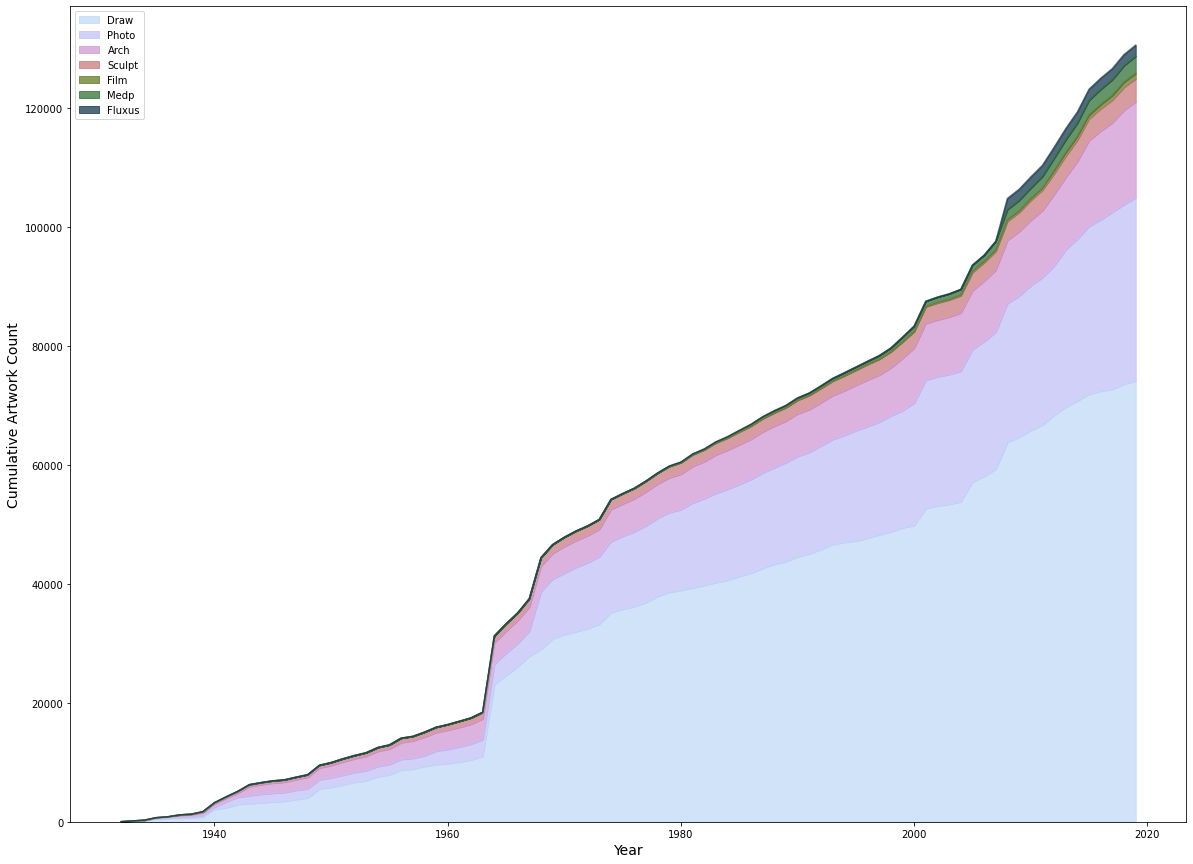

In [4]:
#hide_input
mediatime = momamedia.plot.area(x = 'Years', color = ['#c2daf6', '#c2c1f8', '#d19ad5', '#c97b80', '#647c27', '#327235', '#16394d'], alpha=0.75, figsize = [20,15])
mediatime.set_xlabel('Year',fontsize = 14)
mediatime.set_ylabel('Cumulative Artwork Count',fontsize = 14)
mediatime.legend(loc='upper left')


The purple scatter plot below graphs the artwork ages of each piece against the year it was acquired. On average, MoMA acquires artworks 35 years since it was published or produced by the artist. Use the dropdown menu for the pink scatter plot to see artwork ages in different departments. As predicted, media formats that appeared in the collection later have a lower average artwork age.

In [5]:
createacq = pd.read_csv('createacq.csv')
createacq2 = pd.read_csv('createacq2.csv')

In [6]:
#hide_input
def widgetcreate(Department='Architecture & Design'):
    
    fig,ax = plt.subplots(1,2,figsize=(16,8))
    
    x = createacq[createacq.Department==Department].AcqYear
    y = createacq[createacq.Department==Department].Difference
    b = createacq2.AcqYear
    c = createacq2.Difference
    
    ax[0].scatter(b,c,color='#c2c1f8',alpha = 0.2)
    ax[0].set_title('Artwork Age during Acquistion for All Departments')
    ax[0].set_xlim(1929, 2019)
    ax[0].set_ylim(0, 300)
    ax[0].text(1931,200,'Average Artwork Age when Acquired = {:.2f}'.format(c.mean()))
    
    ax[1].scatter(x,y,color='#d19ad5',alpha = 0.2)
    ax[1].set_xlim(1929, 2019)
    ax[1].set_ylim(0, 300)
    ax[1].set_title('Artwork Age during Acquistion for ' + Department)
    ax[1].text(1931,200,'Average Artwork Age when Acquired = {:.2f}'.format(y.mean()))
    
    fig.show()

ipywidgets.interact(widgetcreate, Department=createacq.Department.unique());


interactive(children=(Dropdown(description='Department', options=('Architecture & Design', 'Drawings & Prints'…

From the graphs above, it can be deduced that MoMA's acquisition patterns is responsive to new media trends. It is likely that new media trends sparked changes to MoMA's archival methods, making it possible to store new media formats like videos in the 1930s.

### Visualizing Social Representation at MoMA

Over the years, MoMA's collections has spanned 109 countries. However, this does not mean that each country has equal representation in their collection. Approximately 25% of the countries represented are represented by two or less pieces in the collection. 

In [14]:
#hide_input
c = momaartist.groupby('Country')[['DisplayName']].count()
country_df = c.reset_index()

In [15]:
#hide_input
country_df[["DisplayName"]].describe()

,DisplayName
count,109.000000
mean,139.559633
std,572.275630
min,1.000000
25%,2.000000
50%,7.000000
75%,60.000000
max,5203.000000


In [16]:
#hide_input
m = folium.Map()
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
country_shapes = f'{url}/world-countries.json'

In [17]:
#hide_input
bins = list(country_df["DisplayName"].quantile([0, 0.75, 0.875, 1]))
folium.Choropleth(geo_data=country_shapes,  #The GeoJSON data to represent the world country
                  data=country_df,  # the dataframe containing the data
                  columns=['Country', 'DisplayName'],  #The column aceppting list with 2 value; The country name and  the numerical value
                  key_on='feature.properties.name',
                  fill_color='PuRd',
                  nan_fill_color='white',
                  bins=bins).add_to(m)

In [18]:
#hide_input
m = folium.Map()
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
country_shapes = f'{url}/world-countries.json'

In [19]:
#hide_input
bins = list(country_df["DisplayName"].quantile([0, 0.75, 0.875, 1]))
folium.Choropleth(geo_data=country_shapes,  #The GeoJSON data to represent the world country
                  data=country_df,  # the dataframe containing the data
                  columns=['Country', 'DisplayName'],  #The column aceppting list with 2 value; The country name and  the numerical value
                  key_on='feature.properties.name',
                  fill_color='PuRd',
                  nan_fill_color='white',
                  bins=bins).add_to(m)

The countries colored in pink in the map below represent the bulk of all of the museum's acquisitions.

In [20]:
#hide_input
m

To delve deeper, let us look into the top 10 most represented nationalities amongst artists whose work has been acquired by MoMA.

In [21]:
#hide_input
m = momaartist.groupby('Nationality')[['DisplayName']].count()
a = m.sort_values(by = 'DisplayName', ascending=False)
b = a.head(9)

Text(0, 0.5, 'Artist Nationalities')

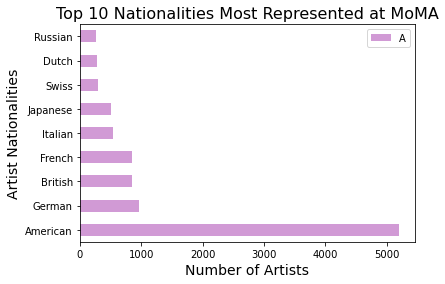

In [22]:
#hide_input
bar = b.plot(kind = 'barh', color='#d19ad5')
bar.set_title('Top 10 Nationalities Most Represented at MoMA', fontsize = 16)
bar.legend('Artist Nationalities',fontsize = 10)
bar.set_xlabel('Number of Artists',fontsize = 14)
bar.set_ylabel('Artist Nationalities',fontsize = 14)

Japan is the only country from the Global South that is represented in this list. It is expected that American artworks (since MoMA is located in New York) is the most represented. However, the map and this bar chart shows that Western Europe is also well represented in the collection, suggesting Eurocentric acquisition patterns.

While conducting a continential analysis of the museum's collection, the piechart below confirms my suspicions about Eurocentrism. 71% of artists in the represented in the collection is European or American.

In [23]:
#hide_input
stacks = pd.read_csv('stacks.csv')
stackedhist = stacks[stacks.Years != 'Unknown']

Text(0, 0.5, '')

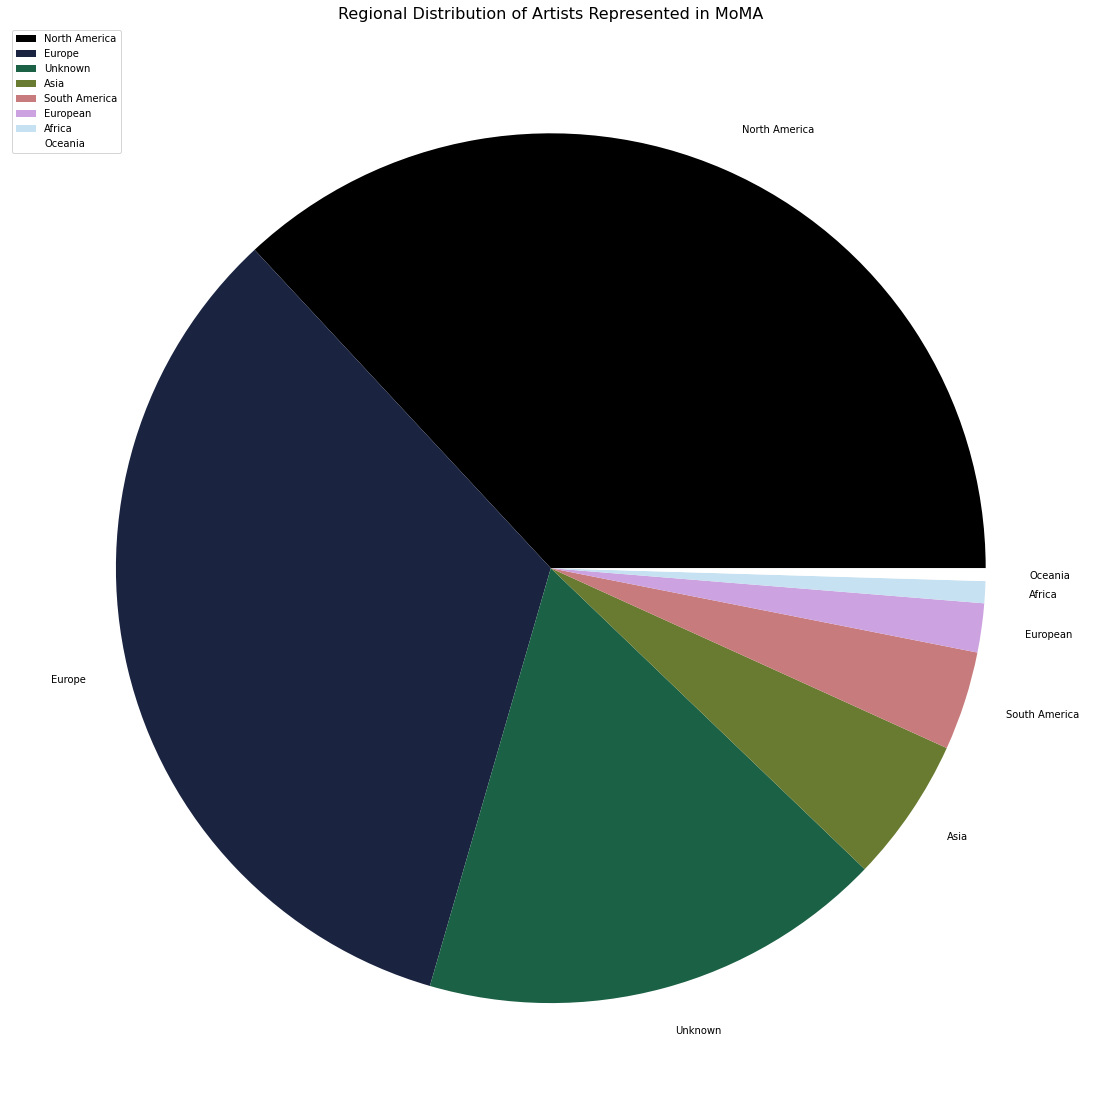

In [24]:
#hide_input
m = momaartist.groupby('Continent')[['DisplayName']].count()
c = m.sort_values(by = 'DisplayName', ascending=False)
myexplode = [0.2, 0.2, 0, 0, 0, 0, 0, 0]
pie = c.plot.pie(y='DisplayName', figsize=(30, 20), colormap="cubehelix")
pie.set_title('Regional Distribution of Artists Represented in MoMA', fontsize = 16)
pie.set_xlabel('')
pie.set_ylabel('')


However, these numbers may be skewed from past acquistions rather recent ones. Looking at the time series graph below, perhaps it would be useful to do a case study on MoMA's significant spike in acquistions during the 1960s

Text(0, 0.5, 'Number of Acquisitions')

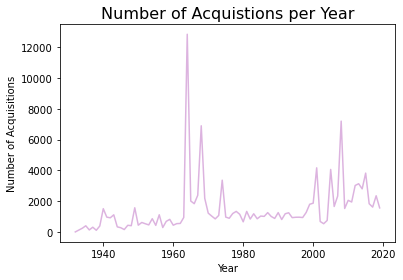

In [12]:
#hide_input
s = stacks.plot.line(x= 'Years', y = 'Total',
                 color='#d19ad5', alpha=0.75, legend = False)
s.set_title('Number of Acquistions per Year', fontsize = 16)
s.set_xlabel('Year')
s.set_ylabel('Number of Acquisitions')

### The Sixties: MoMA's Golden Age?

Between 1940 and 1964, MoMA's annual artwork acquistions rose from 1538 to 1964. The 1960s in America was an eventful decade with the Vietnam War and the Civil Rights Movement. Could this spike in artwork acquisitions be a sign of the museum's attempt to archive this historical period? 

In [6]:
#hide_input
genderstacksix = pd.read_csv('genderstacksix.csv')
genderstack = genderstacksix.drop(columns = 'Artist')



<AxesSubplot:ylabel='Years'>

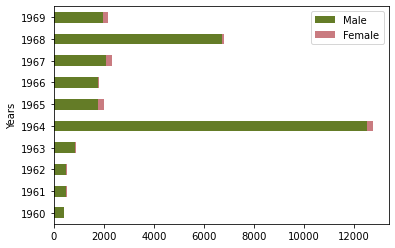

In [8]:
#hide_input
genderstack.plot.barh(stacked=True, x = 'Years',
                  color = ['#647c27', '#c97b80', '#d19ad5', '#c2c1f8', '#c2daf6'])


According to the barchart above, the gender distribution of artworks acquired in the 1960s remains male-dominated. This indicates that feminist movements of the radical '60s did little to shift representation of non-men artists in MoMA.

In [26]:
#hide_input
momamedia = pd.read_csv('momamedia.csv')
six = momamedia.iloc[27:37]
sixties = six.drop(columns = ['Total','Fluxus','Medp','Film'])


<AxesSubplot:ylabel='Years'>

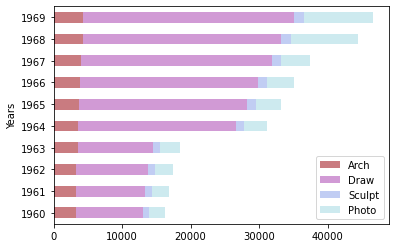

In [30]:
#hide_input
sixties.plot.barh(stacked=True, x = 'Years',
                  color = ['#c97b80','#d19ad5', '#c1cdf3', '#cdeaef','#edfaf4'])


Moreover, the barchart above shows that no significant introduction of new media during this time.


In [5]:
#hide_input
countrystacksix = pd.read_csv('countrystacksix.csv')
countrystack = countrystacksix.drop(columns = 'Title')


<AxesSubplot:ylabel='Years'>

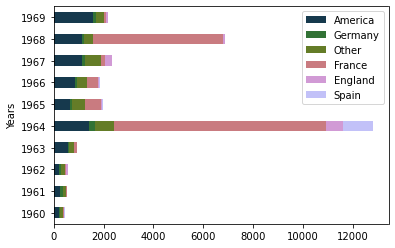

In [6]:
#hide_input
countrystack.plot.barh(stacked=True, x = 'Years',
                  color = ['#16394d', '#327235', '#647c27', '#c97b80', '#d19ad5', '#c2c1f8', '#c2daf6'])


Looking into the country of origin of MoMA's acquisitions in the '60s it became obvious: the spike in acquisitions during this decade is from the increase of French acquisitions in the early half of the 1960s. But why?


During the '60s French president Charles de Gaulle maintained close relations with President John F. Kennedy and President Richard Nixon. Art was one of the many sites of cultural exchange between the French and Americans. [Most significantly during JFK's reign in 1963, the Mona Lisa was unveiled at the National Gallery of Art, Washington DC.](https://www.tate.org.uk/tate-etc/issue-6-spring-2006/jackie-jfk-and-art-diplomacy) This geopolitical relationship is reflected through MoMA acquisition trends, as French art collectors become more likely to donate to American Museums. While the Mona Lisa was on loan at the neighboring Metropolitan Museum of the Arts in 1963, MoMA received a generous donation of roughly 11,000 French prints and illustrated books from Louis E. Stern.

## Discussion

From this data exploration of MoMA's acquisitions since its establishment, I extracted three key points:
- When new media trends emerge, MoMA will likely acquire works in the same media format. This is likely because new technology is now available for the museum to update their archive storage methods.
- As a museum specializing in modern and contemporary art, social representation in MoMA's art collection remains Eurocentric. Although it will take years to undo past patterns, there needs to be a concious effort to improve inclusivity in MoMA's art collection.
- The 1960s showed a significant spike in MoMA's acquisitions, although this is not a reflection of the ongoing social movements of the 1960s but rather a reflection of geopolitical relationship building.